## Dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron


## Generación de datos sintéticos

In [2]:
X,y = make_blobs(100,2,centers=2,cluster_std=0.2)

### Conjunto de entrenamiento $S_n = \{(x^{(i)},y^{(i)}),i=1,\ldots,n\}$

In [3]:
Sn = pd.DataFrame(X,columns=['x1','x2'])
Sn['y'] = y

In [4]:
Sn.head()

,x1,x2,y
0,-0.707690,9.313508,0
1,-0.687320,9.306946,0
2,8.537359,-6.142796,1
3,8.210486,-6.095551,1
4,8.420418,-5.744141,1


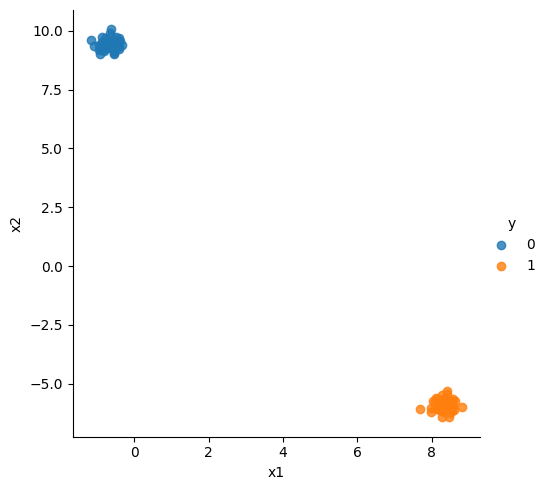

In [5]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)

## Implementación del Perceptrón 

In [6]:
def PerceptronCasero(Sn:pd.DataFrame,T:int)->tuple:
    k = 0
    d = Sn.shape[-1]-1
    n = Sn.shape[0]
    theta = np.zeros(d)
    theta0 = 0.0 
    for t in range(T):
        for i in range(n):
            x = Sn.loc[i].values[:d]
            y = Sn.loc[i].values[-1]
            if y*(np.sign(np.dot(theta,x)+theta0))<=0:
                k+=1
                theta += y*x
                theta0 += y
    return theta,theta0,k

In [7]:
theta,theta0,k = PerceptronCasero(Sn,10)
theta,theta0,k

(array([ 8.53735868, -6.14279614]), 1.0, 501)

## Ecuación del clasificador $\theta\cdot x+\theta_0$

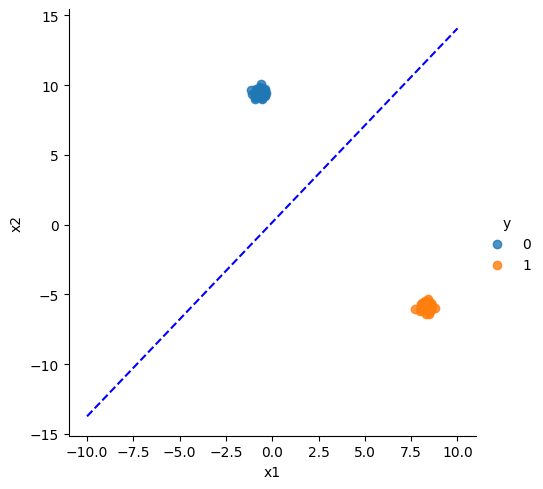

In [8]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--',color='blue')

## Con sklearn

In [9]:
per = Perceptron()

In [10]:
per.fit(Sn[['x1','x2']],Sn['y'])

Perceptron()

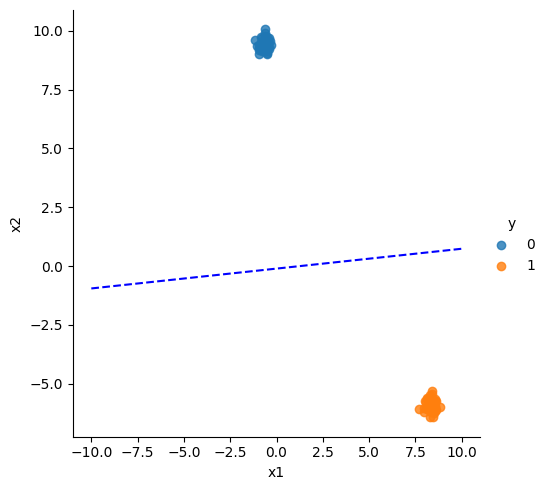

In [11]:
theta,theta0 = per.coef_[0],per.intercept_[0]
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta0-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--',color='blue')